In [76]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Classification

## Importing MNist Data

In [56]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [57]:
y_train.shape

(60000,)

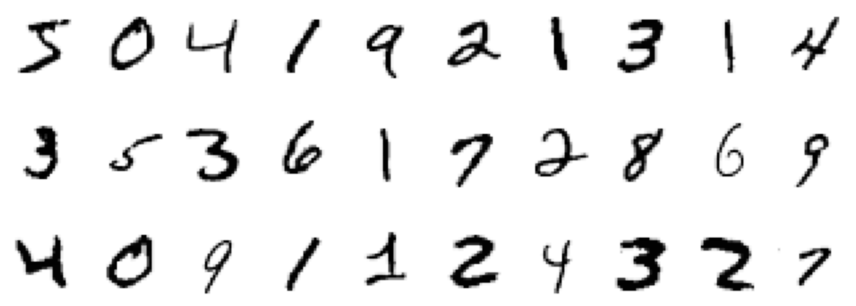

In [58]:
plt.figure(figsize=(12,5))
for k in range(30):
    plt.subplot(3,10,k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

## Preprocessing

Let's preprocess our images so that each pixel value is between 0.0 and 1.0 -- as floating point values.

In [60]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1).astype('float32')

In [61]:
X_train /= 255.
X_valid /= 255.

In [64]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

## Neural Architecture

Let's try a simple Dense feed-forward neural network

In [77]:
# Input layer
i = Input((28, 28, 1))

dense = Flatten()(i)
dense = Dense(128, activation='relu')(dense)
dense = Dense(n_classes, activation='softmax')(dense)

# Model definition
model = Model(inputs=i, outputs=dense)

In [78]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['Precision', 'Recall', 'accuracy'])

In [90]:
model.fit(X_train, y_train, batch_size=256, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0455 - precision: 0.9910 - recall: 0.9860 - accuracy: 0.9884 - val_loss: 0.0853 - val_precision: 0.9798 - val_recall: 0.9736 - val_accuracy: 0.9760
Epoch 2/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0452 - precision: 0.9909 - recall: 0.9861 - accuracy: 0.9886 - val_loss: 0.0851 - val_precision: 0.9794 - val_recall: 0.9732 - val_accuracy: 0.9757
Epoch 3/200
235/235 [==============================] - 1s 2ms/step - loss: 0.0448 - precision: 0.9910 - recall: 0.9861 - accuracy: 0.9884 - val_loss: 0.0842 - val_precision: 0.9800 - val_recall: 0.9745 - val_accuracy: 0.9773
Epoch 4/200
235/235 [==============================] - 1s 2ms/step - loss: 0.0443 - precision: 0.9910 - recall: 0.9867 - accuracy: 0.9886 - val_loss: 0.0846 - val_precision: 0.9798 - val_recall: 0.9741 - val_accuracy: 0.9766
Epoch 5/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0443 - precision: 0.991

235/235 [==============================] - 1s 3ms/step - loss: 0.0350 - precision: 0.9933 - recall: 0.9898 - accuracy: 0.9915 - val_loss: 0.0824 - val_precision: 0.9805 - val_recall: 0.9761 - val_accuracy: 0.9776
Epoch 38/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0347 - precision: 0.9933 - recall: 0.9899 - accuracy: 0.9916 - val_loss: 0.0827 - val_precision: 0.9791 - val_recall: 0.9746 - val_accuracy: 0.9769
Epoch 39/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0344 - precision: 0.9934 - recall: 0.9899 - accuracy: 0.9917 - val_loss: 0.0831 - val_precision: 0.9800 - val_recall: 0.9759 - val_accuracy: 0.9770
Epoch 40/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0341 - precision: 0.9938 - recall: 0.9900 - accuracy: 0.9919 - val_loss: 0.0827 - val_precision: 0.9794 - val_recall: 0.9753 - val_accuracy: 0.9773
Epoch 41/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0340 - precision: 0.9934 - reca

235/235 [==============================] - 1s 3ms/step - loss: 0.0269 - precision: 0.9955 - recall: 0.9929 - accuracy: 0.9942 - val_loss: 0.0816 - val_precision: 0.9799 - val_recall: 0.9760 - val_accuracy: 0.9779
Epoch 74/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0267 - precision: 0.9955 - recall: 0.9929 - accuracy: 0.9941 - val_loss: 0.0811 - val_precision: 0.9801 - val_recall: 0.9768 - val_accuracy: 0.9782
Epoch 75/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0265 - precision: 0.9953 - recall: 0.9929 - accuracy: 0.9940 - val_loss: 0.0811 - val_precision: 0.9797 - val_recall: 0.9764 - val_accuracy: 0.9779
Epoch 76/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0263 - precision: 0.9957 - recall: 0.9930 - accuracy: 0.9944 - val_loss: 0.0808 - val_precision: 0.9797 - val_recall: 0.9762 - val_accuracy: 0.9778
Epoch 77/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0261 - precision: 0.9955 - reca

235/235 [==============================] - 1s 3ms/step - loss: 0.0205 - precision: 0.9970 - recall: 0.9953 - accuracy: 0.9962 - val_loss: 0.0828 - val_precision: 0.9799 - val_recall: 0.9760 - val_accuracy: 0.9777
Epoch 110/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0203 - precision: 0.9970 - recall: 0.9952 - accuracy: 0.9962 - val_loss: 0.0825 - val_precision: 0.9796 - val_recall: 0.9768 - val_accuracy: 0.9782
Epoch 111/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0201 - precision: 0.9971 - recall: 0.9954 - accuracy: 0.9961 - val_loss: 0.0822 - val_precision: 0.9793 - val_recall: 0.9761 - val_accuracy: 0.9778
Epoch 112/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0198 - precision: 0.9973 - recall: 0.9953 - accuracy: 0.9964 - val_loss: 0.0812 - val_precision: 0.9793 - val_recall: 0.9762 - val_accuracy: 0.9779
Epoch 113/200
235/235 [==============================] - 1s 4ms/step - loss: 0.0197 - precision: 0.9973 - 

235/235 [==============================] - 1s 3ms/step - loss: 0.0155 - precision: 0.9982 - recall: 0.9971 - accuracy: 0.9978 - val_loss: 0.0841 - val_precision: 0.9793 - val_recall: 0.9763 - val_accuracy: 0.9779
Epoch 146/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0153 - precision: 0.9980 - recall: 0.9972 - accuracy: 0.9976 - val_loss: 0.0834 - val_precision: 0.9789 - val_recall: 0.9766 - val_accuracy: 0.9778
Epoch 147/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0151 - precision: 0.9983 - recall: 0.9972 - accuracy: 0.9977 - val_loss: 0.0833 - val_precision: 0.9793 - val_recall: 0.9767 - val_accuracy: 0.9777
Epoch 148/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0150 - precision: 0.9983 - recall: 0.9972 - accuracy: 0.9977 - val_loss: 0.0842 - val_precision: 0.9789 - val_recall: 0.9763 - val_accuracy: 0.9774
Epoch 149/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0149 - precision: 0.9982 - 

235/235 [==============================] - 1s 3ms/step - loss: 0.0115 - precision: 0.9990 - recall: 0.9982 - accuracy: 0.9987 - val_loss: 0.0860 - val_precision: 0.9789 - val_recall: 0.9763 - val_accuracy: 0.9774
Epoch 182/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0114 - precision: 0.9989 - recall: 0.9984 - accuracy: 0.9987 - val_loss: 0.0857 - val_precision: 0.9786 - val_recall: 0.9764 - val_accuracy: 0.9774
Epoch 183/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0113 - precision: 0.9991 - recall: 0.9984 - accuracy: 0.9987 - val_loss: 0.0856 - val_precision: 0.9791 - val_recall: 0.9768 - val_accuracy: 0.9778
Epoch 184/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0113 - precision: 0.9990 - recall: 0.9984 - accuracy: 0.9987 - val_loss: 0.0860 - val_precision: 0.9794 - val_recall: 0.9767 - val_accuracy: 0.9776
Epoch 185/200
235/235 [==============================] - 1s 3ms/step - loss: 0.0111 - precision: 0.9991 - 

In [112]:
history_df = pd.DataFrame(model.history.history['loss'])

<AxesSubplot:>

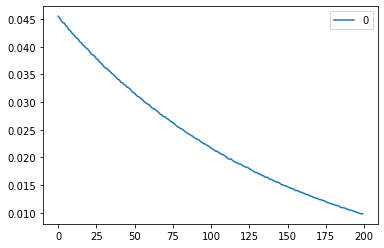

In [113]:
history_df.plot()

# Regression


## Importing Data

In [5]:
housing = pd.read_csv('../data/housing.csv')

In [27]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Selecting Data

In [ ]:
housing = housing.dropna()

In [28]:
selected_columns = ["median_house_value", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]

df = housing[selected_columns]

In [29]:
df.head()

,median_house_value,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,452600.0,41.0,880.0,129.0,322.0,126.0,8.3252
1,358500.0,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,352100.0,52.0,1467.0,190.0,496.0,177.0,7.2574
3,341300.0,52.0,1274.0,235.0,558.0,219.0,5.6431
4,342200.0,52.0,1627.0,280.0,565.0,259.0,3.8462


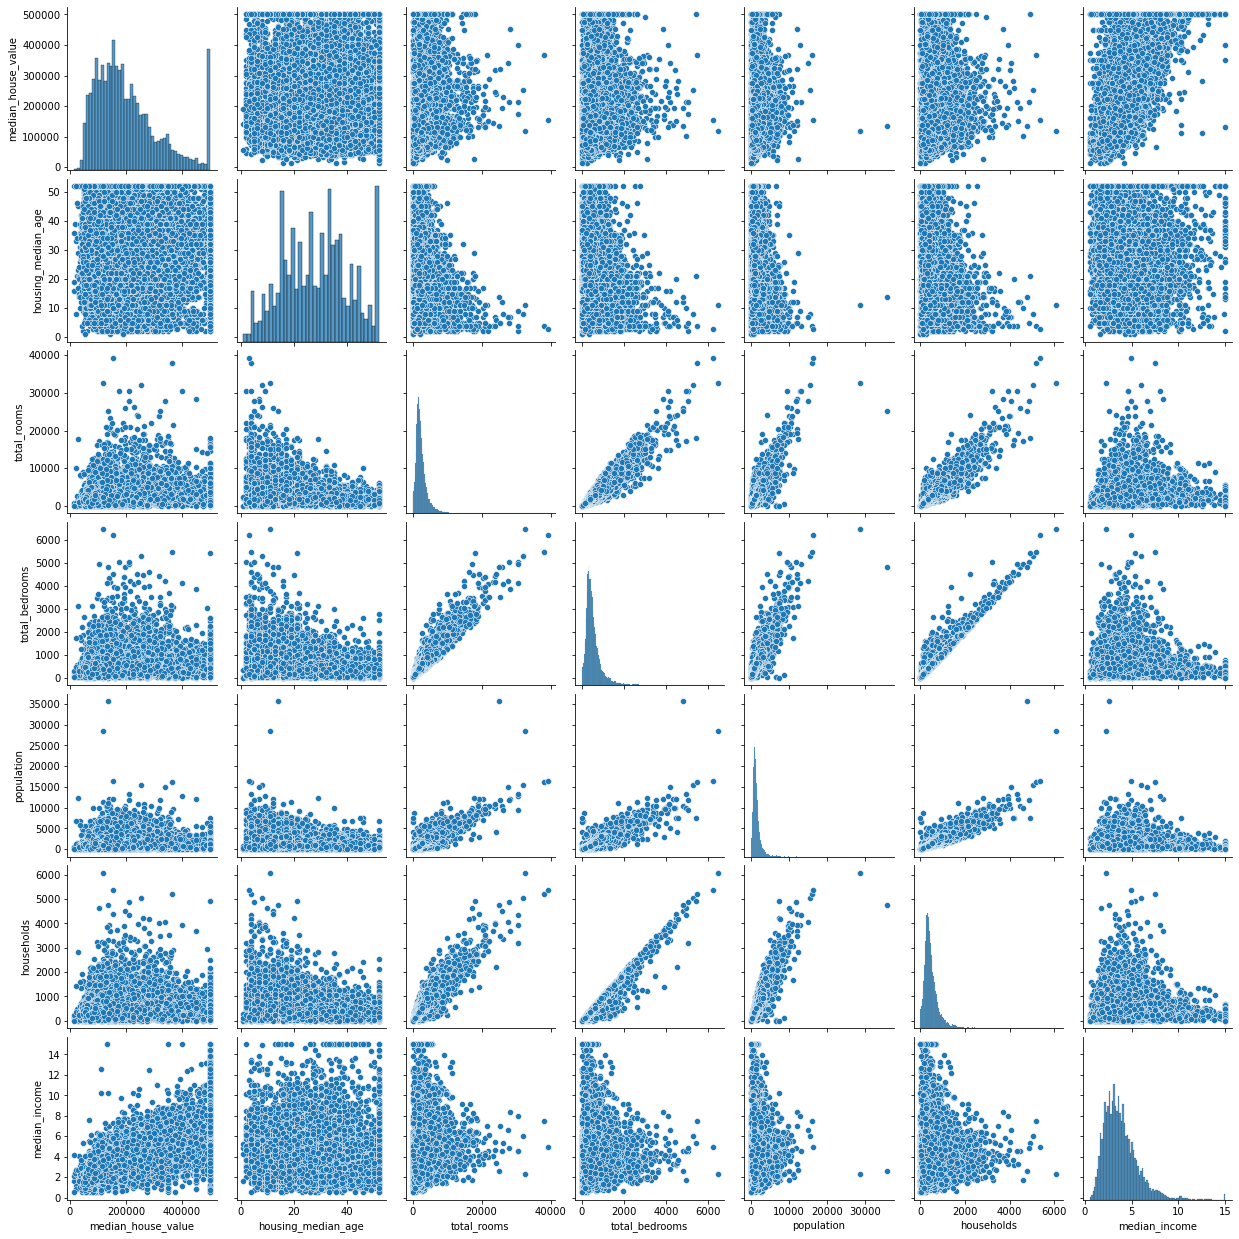

In [30]:
sns.pairplot(df)

In [31]:
df.shape

(20433, 7)

In [32]:
# need to get numpy arrays (ndarray) by calling 'values'

X = df[["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]].values
y = df["median_house_value"].values

In [33]:
type(X)

numpy.ndarray

In [34]:
type(y)

numpy.ndarray

## Preprocessing Training & Testing Data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
X_train.shape

(14303, 6)

In [37]:
X_test.shape

(6130, 6)

In [38]:
# Scaling features to be between 0 and 1
scaler = MinMaxScaler()

In [39]:
# Fit the scaler to std dev, min and max of training data set
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X_train.max()

1.0

In [42]:
X_train.min()

0.0

## Building Neural Network Model

In [ ]:
# Method #1
model = Sequential([
                    Dense(10, activation='relu'),
                    Dense(20, activation='relu'),
                    Dense(1)              # linear activation a(x) = x
                   ])

In [44]:
# Method #2
model = Sequential()

model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))                       # linear activation a(x) = x

2022-11-06 15:33:17.745057: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [45]:
model.compile(optimizer='adam', loss='mse', metrics=['Precision', 'Recall', 'accuracy'])

In [51]:
model.fit(x=X_train, y=y_train, epochs=1000, batch_size=500, validation_data=(X_test, y_test))

Epoch 1/1000
144/144 [==============================] - 0s 715us/step - loss: 5907062784.0000
Epoch 2/1000
144/144 [==============================] - 0s 709us/step - loss: 5906466304.0000
Epoch 3/1000
144/144 [==============================] - 0s 686us/step - loss: 5906855424.0000
Epoch 4/1000
144/144 [==============================] - 0s 727us/step - loss: 5905714688.0000
Epoch 5/1000
144/144 [==============================] - 0s 732us/step - loss: 5904940544.0000
Epoch 6/1000
144/144 [==============================] - 0s 676us/step - loss: 5904679424.0000
Epoch 7/1000
144/144 [==============================] - 0s 747us/step - loss: 5904406528.0000
Epoch 8/1000
144/144 [==============================] - 0s 741us/step - loss: 5903704064.0000
Epoch 9/1000
144/144 [==============================] - 0s 727us/step - loss: 5902924800.0000
Epoch 10/1000
144/144 [==============================] - 0s 717us/step - loss: 5902764032.0000
Epoch 11/1000
144/144 [==============================] - 0s

144/144 [==============================] - 0s 737us/step - loss: 5865837568.0000
Epoch 88/1000
144/144 [==============================] - 0s 704us/step - loss: 5865543680.0000
Epoch 89/1000
144/144 [==============================] - 0s 770us/step - loss: 5865007104.0000
Epoch 90/1000
144/144 [==============================] - 0s 794us/step - loss: 5865488896.0000
Epoch 91/1000
144/144 [==============================] - 0s 729us/step - loss: 5864328704.0000
Epoch 92/1000
144/144 [==============================] - 0s 704us/step - loss: 5863611904.0000
Epoch 93/1000
144/144 [==============================] - 0s 733us/step - loss: 5863563264.0000
Epoch 94/1000
144/144 [==============================] - 0s 743us/step - loss: 5863440384.0000
Epoch 95/1000
144/144 [==============================] - 0s 720us/step - loss: 5862594560.0000
Epoch 96/1000
144/144 [==============================] - 0s 714us/step - loss: 5862163968.0000
Epoch 97/1000
144/144 [==============================] - 0s 742u

144/144 [==============================] - 0s 724us/step - loss: 5833550848.0000
Epoch 173/1000
144/144 [==============================] - 0s 731us/step - loss: 5833174016.0000
Epoch 174/1000
144/144 [==============================] - 0s 691us/step - loss: 5833372672.0000
Epoch 175/1000
144/144 [==============================] - 0s 732us/step - loss: 5832657920.0000
Epoch 176/1000
144/144 [==============================] - 0s 707us/step - loss: 5832162816.0000
Epoch 177/1000
144/144 [==============================] - 0s 681us/step - loss: 5832223232.0000
Epoch 178/1000
144/144 [==============================] - 0s 717us/step - loss: 5831639040.0000
Epoch 179/1000
144/144 [==============================] - 0s 721us/step - loss: 5831381504.0000
Epoch 180/1000
144/144 [==============================] - 0s 693us/step - loss: 5831012352.0000
Epoch 181/1000
144/144 [==============================] - 0s 701us/step - loss: 5830574080.0000
Epoch 182/1000
144/144 [==============================]

144/144 [==============================] - 0s 793us/step - loss: 5808716288.0000
Epoch 258/1000
144/144 [==============================] - 0s 818us/step - loss: 5808525312.0000
Epoch 259/1000
144/144 [==============================] - 0s 800us/step - loss: 5808783872.0000
Epoch 260/1000
144/144 [==============================] - 0s 850us/step - loss: 5807911936.0000
Epoch 261/1000
144/144 [==============================] - 0s 856us/step - loss: 5807417344.0000
Epoch 262/1000
144/144 [==============================] - 0s 698us/step - loss: 5807551488.0000
Epoch 263/1000
144/144 [==============================] - 0s 693us/step - loss: 5807058944.0000
Epoch 264/1000
144/144 [==============================] - 0s 678us/step - loss: 5807546368.0000
Epoch 265/1000
144/144 [==============================] - 0s 782us/step - loss: 5806832128.0000
Epoch 266/1000
144/144 [==============================] - 0s 788us/step - loss: 5806907904.0000
Epoch 267/1000
144/144 [==============================]

144/144 [==============================] - 0s 722us/step - loss: 5790732800.0000
Epoch 343/1000
144/144 [==============================] - 0s 690us/step - loss: 5790346240.0000
Epoch 344/1000
144/144 [==============================] - 0s 715us/step - loss: 5790291968.0000
Epoch 345/1000
144/144 [==============================] - 0s 679us/step - loss: 5789982208.0000
Epoch 346/1000
144/144 [==============================] - 0s 685us/step - loss: 5789952512.0000
Epoch 347/1000
144/144 [==============================] - 0s 695us/step - loss: 5789870592.0000
Epoch 348/1000
144/144 [==============================] - 0s 688us/step - loss: 5789652480.0000
Epoch 349/1000
144/144 [==============================] - 0s 716us/step - loss: 5789635072.0000
Epoch 350/1000
144/144 [==============================] - 0s 699us/step - loss: 5789280768.0000
Epoch 351/1000
144/144 [==============================] - 0s 692us/step - loss: 5789253632.0000
Epoch 352/1000
144/144 [==============================]

144/144 [==============================] - 0s 787us/step - loss: 5778854912.0000
Epoch 428/1000
144/144 [==============================] - 0s 697us/step - loss: 5778413056.0000
Epoch 429/1000
144/144 [==============================] - 0s 718us/step - loss: 5777884672.0000
Epoch 430/1000
144/144 [==============================] - 0s 755us/step - loss: 5778039296.0000
Epoch 431/1000
144/144 [==============================] - 0s 732us/step - loss: 5778024448.0000
Epoch 432/1000
144/144 [==============================] - 0s 731us/step - loss: 5777965568.0000
Epoch 433/1000
144/144 [==============================] - 0s 726us/step - loss: 5777451520.0000
Epoch 434/1000
144/144 [==============================] - 0s 742us/step - loss: 5777509888.0000
Epoch 435/1000
144/144 [==============================] - 0s 723us/step - loss: 5777924608.0000
Epoch 436/1000
144/144 [==============================] - 0s 729us/step - loss: 5776861696.0000
Epoch 437/1000
144/144 [==============================]

144/144 [==============================] - 0s 727us/step - loss: 5769783296.0000
Epoch 513/1000
144/144 [==============================] - 0s 714us/step - loss: 5769690624.0000
Epoch 514/1000
144/144 [==============================] - 0s 723us/step - loss: 5769489408.0000
Epoch 515/1000
144/144 [==============================] - 0s 733us/step - loss: 5769478144.0000
Epoch 516/1000
144/144 [==============================] - 0s 740us/step - loss: 5769440768.0000
Epoch 517/1000
144/144 [==============================] - 0s 717us/step - loss: 5769486848.0000
Epoch 518/1000
144/144 [==============================] - 0s 726us/step - loss: 5769282560.0000
Epoch 519/1000
144/144 [==============================] - 0s 733us/step - loss: 5769176576.0000
Epoch 520/1000
144/144 [==============================] - 0s 707us/step - loss: 5768807936.0000
Epoch 521/1000
144/144 [==============================] - 0s 745us/step - loss: 5768873984.0000
Epoch 522/1000
144/144 [==============================]

144/144 [==============================] - 0s 724us/step - loss: 5763825664.0000
Epoch 598/1000
144/144 [==============================] - 0s 736us/step - loss: 5764068864.0000
Epoch 599/1000
144/144 [==============================] - 0s 781us/step - loss: 5763821568.0000
Epoch 600/1000
144/144 [==============================] - 0s 711us/step - loss: 5763654656.0000
Epoch 601/1000
144/144 [==============================] - 0s 745us/step - loss: 5764217856.0000
Epoch 602/1000
144/144 [==============================] - 0s 710us/step - loss: 5763308544.0000
Epoch 603/1000
144/144 [==============================] - 0s 691us/step - loss: 5763496960.0000
Epoch 604/1000
144/144 [==============================] - 0s 700us/step - loss: 5763341312.0000
Epoch 605/1000
144/144 [==============================] - 0s 691us/step - loss: 5763330048.0000
Epoch 606/1000
144/144 [==============================] - 0s 689us/step - loss: 5763532288.0000
Epoch 607/1000
144/144 [==============================]

144/144 [==============================] - 0s 702us/step - loss: 5760055296.0000
Epoch 683/1000
144/144 [==============================] - 0s 739us/step - loss: 5760511488.0000
Epoch 684/1000
144/144 [==============================] - 0s 720us/step - loss: 5759701504.0000
Epoch 685/1000
144/144 [==============================] - 0s 736us/step - loss: 5760340992.0000
Epoch 686/1000
144/144 [==============================] - 0s 732us/step - loss: 5759693824.0000
Epoch 687/1000
144/144 [==============================] - 0s 725us/step - loss: 5760004096.0000
Epoch 688/1000
144/144 [==============================] - 0s 725us/step - loss: 5759876608.0000
Epoch 689/1000
144/144 [==============================] - 0s 719us/step - loss: 5760092160.0000
Epoch 690/1000
144/144 [==============================] - 0s 768us/step - loss: 5759908352.0000
Epoch 691/1000
144/144 [==============================] - 0s 731us/step - loss: 5759882752.0000
Epoch 692/1000
144/144 [==============================]

144/144 [==============================] - 0s 739us/step - loss: 5757513216.0000
Epoch 768/1000
144/144 [==============================] - 0s 701us/step - loss: 5757508608.0000
Epoch 769/1000
144/144 [==============================] - 0s 707us/step - loss: 5757447680.0000
Epoch 770/1000
144/144 [==============================] - 0s 696us/step - loss: 5757643776.0000
Epoch 771/1000
144/144 [==============================] - 0s 724us/step - loss: 5758063616.0000
Epoch 772/1000
144/144 [==============================] - 0s 751us/step - loss: 5757691392.0000
Epoch 773/1000
144/144 [==============================] - 0s 728us/step - loss: 5757584896.0000
Epoch 774/1000
144/144 [==============================] - 0s 750us/step - loss: 5757737472.0000
Epoch 775/1000
144/144 [==============================] - 0s 711us/step - loss: 5757659136.0000
Epoch 776/1000
144/144 [==============================] - 0s 743us/step - loss: 5757347840.0000
Epoch 777/1000
144/144 [==============================]

144/144 [==============================] - 0s 740us/step - loss: 5756282880.0000
Epoch 853/1000
144/144 [==============================] - 0s 724us/step - loss: 5755943424.0000
Epoch 854/1000
144/144 [==============================] - 0s 760us/step - loss: 5756340224.0000
Epoch 855/1000
144/144 [==============================] - 0s 753us/step - loss: 5756141056.0000
Epoch 856/1000
144/144 [==============================] - 0s 700us/step - loss: 5755999744.0000
Epoch 857/1000
144/144 [==============================] - 0s 730us/step - loss: 5755983872.0000
Epoch 858/1000
144/144 [==============================] - 0s 733us/step - loss: 5756054016.0000
Epoch 859/1000
144/144 [==============================] - 0s 701us/step - loss: 5756172288.0000
Epoch 860/1000
144/144 [==============================] - 0s 712us/step - loss: 5755905536.0000
Epoch 861/1000
144/144 [==============================] - 0s 690us/step - loss: 5756224000.0000
Epoch 862/1000
144/144 [==============================]

144/144 [==============================] - 0s 731us/step - loss: 5755788800.0000
Epoch 938/1000
144/144 [==============================] - 0s 732us/step - loss: 5754872320.0000
Epoch 939/1000
144/144 [==============================] - 0s 709us/step - loss: 5755129856.0000
Epoch 940/1000
144/144 [==============================] - 0s 702us/step - loss: 5754890752.0000
Epoch 941/1000
144/144 [==============================] - 0s 740us/step - loss: 5755297280.0000
Epoch 942/1000
144/144 [==============================] - 0s 729us/step - loss: 5754880000.0000
Epoch 943/1000
144/144 [==============================] - 0s 684us/step - loss: 5754737664.0000
Epoch 944/1000
144/144 [==============================] - 0s 696us/step - loss: 5754826752.0000
Epoch 945/1000
144/144 [==============================] - 0s 702us/step - loss: 5754870272.0000
Epoch 946/1000
144/144 [==============================] - 0s 731us/step - loss: 5754578432.0000
Epoch 947/1000
144/144 [==============================]

## Evaluating Model

In [52]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

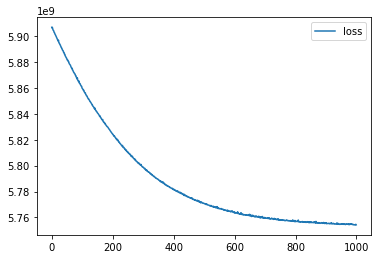

In [53]:
loss_df.plot()

In [54]:
model.evaluate(X_test, y_test, verbose=0)

5665393664.0

In [55]:
model.evaluate(X_train, y_train, verbose=0)

5753840640.0